In [4]:
import pandas as pd
import numpy as np
import pyreadstat
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import matplotlib.font_manager as fm

font_dirs = ['/usr/share/fonts/truetype/nanum', ]
font_files = fm.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    fm.fontManager.addfont(font_file)

plt.rc('font', family='NanumBarunGothic')

In [6]:
df = pd.read_csv('../data/ott_2019_2020.csv')

In [7]:
merged_df = df.copy()
merged_df

,성별,연령,직업,ott 주중 이용시간대,ott 주말 이용시간대,연도
0,남,20대,학생,21:00~23:59,18:00~20:59,2019
1,남,60세 이상,서비스/판매직,21:00~23:59,이용하지 않음,2019
2,남,60세 이상,사무직,21:00~23:59,15:00~17:59,2019
3,남,40대,생산직,12:00~14:59,12:00~14:59,2019
4,남,40대,생산직,18:00~20:59,15:00~17:59,2019
...,...,...,...,...,...,...
5253,여,40대,사무직,18:00~20:59,이용하지 않음,2020
5254,여,40대,서비스/판매직,21:00~23:59,이용하지 않음,2020
5255,여,40대,서비스/판매직,18:00~20:59,이용하지 않음,2020
5256,여,30대,서비스/판매직,21:00~23:59,21:00~23:59,2020


- 그래프 순서

In [8]:
time_order = ['6:00~8:59',
 '9:00~11:59',
 '12:00~14:59',
 '15:00~17:59',
 '18:00~20:59',
 '21:00~23:59',
 '24:00~5:59',
 '이용하지 않음']

In [9]:
merged_df['직업'].unique()

array(['학생', '서비스/판매직', '사무직', '생산직', '무직', '기타', '주부'], dtype=object)

In [10]:
job_order = ['학생', '주부', '서비스/판매직', '사무직', '생산직', '무직', '기타']

In [11]:
year_colors = ['wheat', 'goldenrod']

##  연도별 ott 이용자 직업 분포

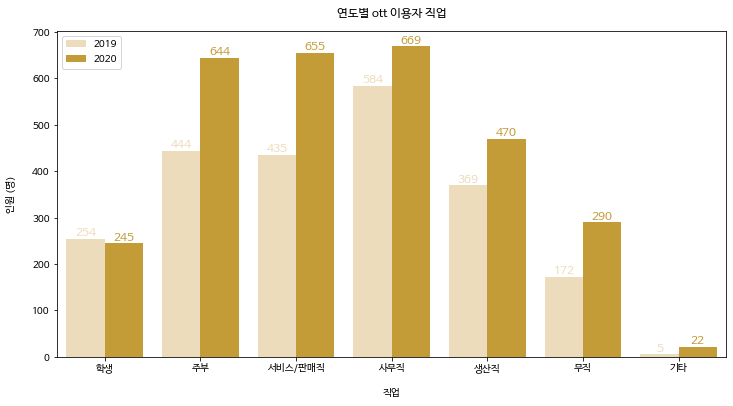

In [15]:
fig, ax = plt.subplots(figsize=(12,6))
sns.set_palette('pastel')
sns.countplot(x=f'직업', hue='연도', order=job_order, palette=year_colors, data=merged_df)
ax.set_title(f'연도별 ott 이용자 직업', pad=15)
ax.set_xlabel('직업', labelpad=15)
ax.set_ylabel('인원 (명)', labelpad=15)

        # legend
ax.legend(loc='upper left')

for bar in ax.patches:
    # The text annotation for each bar should be its height.
    bar_value = bar.get_height()
    # Format the text with commas to separate thousands. You can do
    # any type of formatting here though.
    if bar_value > 0:
        text = f'{int(bar_value):,}'
        text_y = bar.get_y() + bar_value
    else:
        text = 0
        text_y = 0

    text_x = bar.get_x() + bar.get_width() / 2

    bar_color = bar.get_facecolor()
    ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=12)
    
plt.savefig("../data/ppt_png/Number of OTT Users by Jobs", facecolor=(1,1,1,1), dpi=300, bbox_inches='tight', pad_inches=0.1)